In [1]:
import pg8000
import datetime
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
conn = pg8000.connect(database= 'training', port = 5432, host = 'training.c1erymiua9dx.us-east-1.rds.amazonaws.com', user = 'dot_student', password = 'qgis')

In [34]:
conn.rollback()

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("""SELECT column_name FROM information_schema.columns WHERE table_name='noise_311'""")
cursor.fetchall()

(['unique_key'],
 ['created_date'],
 ['closed_date'],
 ['agency'],
 ['agency_name'],
 ['complaint_type'],
 ['descriptor'],
 ['location_type'],
 ['incident_zip'],
 ['incident_address'],
 ['street_name'],
 ['cross_street_1'],
 ['cross_street_2'],
 ['intersection_street_1'],
 ['intersection_street_2'],
 ['address_type'],
 ['city'],
 ['landmark'],
 ['facility_type'],
 ['status'],
 ['due_date'],
 ['resolution_description'],
 ['resolution_action_updated_date'],
 ['community_board'],
 ['borough'],
 ['x_coordinate'],
 ['y_coordinate'],
 ['park_facility_name'],
 ['park_borough'],
 ['school_name'],
 ['school_number'],
 ['school_region'],
 ['school_code'],
 ['school_phone_number'],
 ['school_address'],
 ['school_city'],
 ['school_state'],
 ['school_zip'],
 ['school_not_found'],
 ['school_or_citywide_complaint'],
 ['vehicle_type'],
 ['taxi_company_borough'],
 ['taxi_pick_up_location'],
 ['bridge_highway_name'],
 ['bridge_highway_direction'],
 ['road_ramp'],
 ['bridge_highway_segment'],
 ['garage_l

In [5]:
cursor.execute("""SELECT created_date, closed_date 
    FROM noise_311 
    LIMIT 1""")
cursor.fetchone()

[datetime.datetime(2014, 8, 31, 23, 59), datetime.datetime(2014, 9, 1, 3, 52)]

In [6]:
cursor.execute("""SELECT created_date, closed_date 
    FROM noise_311""")
results = cursor.fetchall()

In [7]:
timelen = []
for created, closed in results:
    if created and closed:
        dif = closed - created
        timelen.append(dif.days * 1440 + dif.seconds/60)

How many total results:

In [8]:
len(results)

37615

How many results had both a created and closed time. They all do!

In [9]:
len(timelen)

37615

And all of these are a few seconds long!

In [10]:
num = 0
for time in timelen:
    if time <= 0:
        num += 1
print(num)

0


In [13]:
df = pd.DataFrame({'timelen': timelen})

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107a474a8>]], dtype=object)

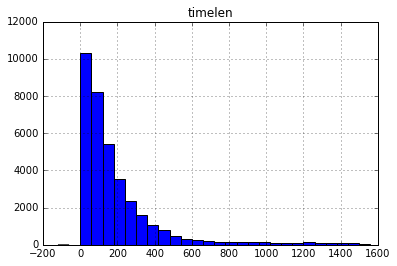

In [14]:
df.hist(bins = 28, range = (-120, 1560))

## Measures of Center

### Mean

In [15]:
df['timelen'].mean()

464.37554167220526

### Median

In [16]:
df['timelen'].median()

122.0

### Mode

In [17]:
df['timelen'].mode()

0    21.0
dtype: float64

## Measures of Spread

### Range

In [19]:
max(df['timelen']) - min(df['timelen'])

69464.0

### Standard Deviation

In [20]:
df['timelen'].std()

2166.1502133322292

### Interquartile Range

In [21]:
df['timelen'].quantile(q=0.75) - df['timelen'].quantile(q=0.25) 

201.0

## Outliers

### Standard Deviation Outlier

### Interquartile Range Outlier